## K nearest neighbors retrieval

### Import Libraries

In [73]:
import pandas as pd
import numpy as np
%run KNN_functions.ipynb

### Importing Spotify Data

In [74]:
spotify_df = pd.read_csv('http://bmobasher.com/Class/Spotify_Combined.csv', index_col=0)

spotify_df.shape

(1420, 18)

### Print 10 rows of the data

In [75]:
spotify_df.head()

,id,name,uri,artist,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,mood(s)
index,,,,,,,,,,,,,,,,,,
0,4dn6rw5Ze1uWrLm1uOk1gu,Stockholm Sweetnin',spotify:track:4dn6rw5Ze1uWrLm1uOk1gu,"Scott Hamilton, Jesper Lundgaard, Jan Lundgren...",0.838,0.602,475680,0.302,0.9070,8,0.1130,-11.627,1,0.0427,119.758,4,0.300,dinner
1,6CDQBADsdzJwc3qZ3OPDHH,Almost Like Being in Love,spotify:track:6CDQBADsdzJwc3qZ3OPDHH,"Red Garland, Paul Chambers, Art Taylor,",0.873,0.571,290293,0.346,0.5190,0,0.0980,-12.569,0,0.0409,93.885,4,0.687,dinner
2,00CIFNT8kOm61dupysBFp8,Garden of Delight,spotify:track:00CIFNT8kOm61dupysBFp8,"Jan Lundgren Trio,",0.876,0.427,291862,0.287,0.8740,11,0.1330,-19.834,1,0.0346,104.407,4,0.467,dinner
3,2z6D5bIA9Wprdqi1B8nnVh,New Orleans,spotify:track:2z6D5bIA9Wprdqi1B8nnVh,"Wynton Marsalis,",0.714,0.644,340693,0.205,0.0482,10,0.0510,-16.005,1,0.0397,118.314,4,0.411,dinner
4,1ykNjOQbYJgZE3pflVB9MN,The Sequel,spotify:track:1ykNjOQbYJgZE3pflVB9MN,"Wingspan,",0.703,0.532,482360,0.364,0.6180,9,0.0602,-13.068,0,0.0297,127.166,4,0.271,dinner


### The describe() method provides a detailed description of variables:

In [76]:
spotify_df.describe(include="all")

,id,name,uri,artist,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,mood(s)
count,1420,1420,1420,1420,1420.000000,1420.000000,1.420000e+03,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420
unique,1420,1378,1420,1160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
top,0HrrWZIJ7hR7C0JmDZ2uvN,The Greatest,spotify:track:5AdFDzY5KY8RehHWVL0010,"Nature Sounds,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dinner
freq,1,3,1,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,467
mean,NaN,NaN,NaN,NaN,0.399612,0.556092,2.834115e+05,0.554682,0.280521,5.138732,0.191559,-10.738530,0.588028,0.082647,116.857767,3.890845,0.398186,NaN
std,NaN,NaN,NaN,NaN,0.381397,0.189472,3.371891e+05,0.294056,0.392521,3.565522,0.165740,7.986422,0.492363,0.082892,27.948877,0.483761,0.258262,NaN
min,NaN,NaN,NaN,NaN,0.000023,0.058500,5.433300e+04,0.001540,0.000000,0.000000,0.022700,-41.808000,0.000000,0.022900,52.799000,1.000000,0.000010,NaN
25%,NaN,NaN,NaN,NaN,0.031525,0.447750,1.961372e+05,0.317750,0.000001,2.000000,0.096675,-14.406000,0.000000,0.037000,95.055250,4.000000,0.186750,NaN
50%,NaN,NaN,NaN,NaN,0.265000,0.588000,2.268000e+05,0.596500,0.002075,5.000000,0.121000,-7.811000,1.000000,0.048750,118.016500,4.000000,0.364500,NaN
75%,NaN,NaN,NaN,NaN,0.815000,0.691000,2.745168e+05,0.801000,0.795500,8.000000,0.231250,-5.034500,1.000000,0.081425,131.499500,4.000000,0.588000,NaN


### getting rid of the missing values.

In [77]:
spotify_df.dropna(axis=0, inplace=True)

### how many rows and columns does the data have?

In [78]:
spotify_df.shape

(1420, 18)

### Performing Data Normalization to rescale numeric values

#### Selecting only the numerical values

In [79]:
spotify_df_mainfeatures = spotify_df[['acousticness','danceability','duration_ms','energy',
                                      'instrumentalness','key','liveness', 'loudness','mode',
                                      'speechiness','tempo','time_signature','valence']]

### normalized the data using the normalize() function.

In [80]:
normalized_data = normalize(spotify_df_mainfeatures)

### Print the top n records to see the result

In [81]:
df = pd.DataFrame(normalized_data)
df.columns = spotify_df_mainfeatures.columns.values

print df.head()

   acousticness  danceability  duration_ms    energy  instrumentalness  \
0      0.841362      0.598239     0.094776  0.300923          0.910643   
1      0.876503      0.564117     0.053076  0.344991          0.521084   
2      0.879515      0.405614     0.053429  0.285900          0.877510   
3      0.716861      0.644469     0.064413  0.203774          0.048394   
4      0.705817      0.521189     0.096279  0.363019          0.620482   

        key  liveness  loudness  mode  speechiness     tempo  time_signature  \
0  0.727273  0.094426  0.735082   1.0     0.039831  0.415445            0.75   
1  0.000000  0.078741  0.712139   0.0     0.036210  0.254917            0.75   
2  1.000000  0.115340  0.535194   1.0     0.023537  0.320201            0.75   
3  0.909091  0.029593  0.628452   1.0     0.033796  0.406486            0.75   
4  0.818182  0.039214  0.699985   0.0     0.013679  0.461408            0.75   

    valence  
0  0.308001  
1  0.705336  
2  0.479461  
3  0.421965  
4  0

## Let's pick a song and see the top K similar songs to it!

### Look in the data, choose a song and write the song id here

In [82]:
show_me_the_song_name(song_id=1413,data=spotify_df)

,name,artist,uri
index,,,
1413,Crazy In Love,"Beyoncé, JAY Z,",spotify:track:5IVuqXILoxVWvWEPm82Jxr


### How many similar songs to this song do you want?

In [83]:
K_nearest_neighbors = 5

### The search function takes a music id, and searches for the K most similar items in the data. The function returns the indices of the K most similar neighbors and a list of their distances to the query object.

In [84]:
nearest_neighbor_indices = knn_search(song_id=1390, data=normalized_data, K=K_nearest_neighbors)

### Print indecies of those songs

In [85]:
print nearest_neighbor_indices

[1391 1350  526 1103  514]


### What are their names? Are they really similar? Play it in spotify and see!

In [86]:
show_me_song_names(spotify_df, nearest_neighbor_indices)

,name,artist,uri
index,,,
514,All We Need feat. Shy Girls - Dzeko & Torres R...,"ODESZA,",spotify:track:1Nf0mk83xLd3CyL8ybd8vw
526,The Universe - Radio Edit,"Lush & Simon,",spotify:track:2uZElNH5HVuRQbWQCkLi8G
1103,Lockjaw,"French Montana, Kodak Black,",spotify:track:7iaw359G2XT14uTfV9feip
1350,Crank It (feat. Lil' Jon),"Ghastly, Mija, Lil Jon,",spotify:track:5JUbszUDGbE2RUoJDsIXqk
1391,Bullet - Instant Karma Remix,"Chelsea Lankes, Instant Karma,",spotify:track:6aFvJSvmAuTuQSPZwK8rrN


### What do these songs have in common? Let's look at their features.

In [89]:
%run KNN_functions.ipynb
features, feature_weights = get_features(spotify_df_mainfeatures, normalized_data, nearest_neighbor_indices)

In [92]:
# print the feature names
print features

['acousticness' 'danceability' 'duration_ms' 'energy' 'instrumentalness' 'key'
 'liveness' 'loudness' 'mode' 'speechiness' 'tempo' 'time_signature' 'valence']


In [93]:
# print their feature values, are they similar?
print feature_weights

[ 0.04  0.64  0.03  0.85  0.    0.71  0.27  0.93  1.    0.08  0.45  0.75  0.53]


### Create a wordcloud based on their features and feature values

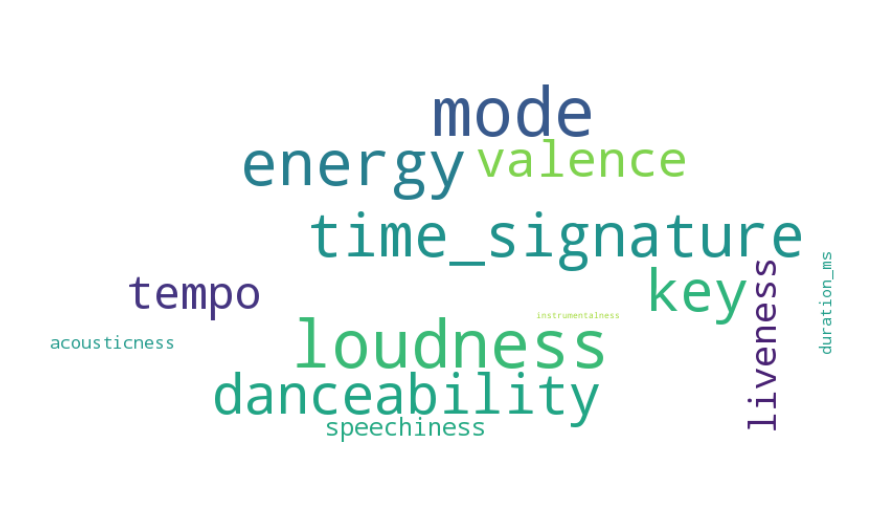

In [94]:
fig = create_wordcloud(features=features, feature_weights=feature_weights)

### Save the picture, choose a name.

In [95]:
fig.savefig("wordcloud_KNN_%d.png" % K_nearest_neighbors, dpi=400)

### Guess what class they belong to? Workout, Party, Dinner or Sleep?

In [97]:
spotify_df.loc[nearest_neighbor_indices,'mood(s)']

index
1391    workout
1350    workout
526       party
1103    workout
514       party
Name: mood(s), dtype: object